# Customer Churn Prediction App – Phase 2: Project Development  

**Course:** CST2101-010 — Business Intelligence Programming  
**Student Name:** Yogesh Bhatt  
**Student ID:** 041153861 

## **Project Outline**  
This project analyzes the **Telco Customer Churn** dataset to identify the factors that influence customer churn. Using Python, Exploratory Data Analysis (EDA), and a Logistic Regression model, the goal is to uncover meaningful patterns and generate valuable business insights.

## **Objectives**  
- Load and clean the dataset  
- Perform Exploratory Data Analysis (EDA)  
- Build a churn prediction model using **Logistic Regression**  
- Generate visual insights to help understand customer behavior  


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

import pickle  # to save model for Streamlit app

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# IMPROVED DATA CLEANING

#Drop customerID
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

#Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Replace "No internet service" with "No" for internet-related columns
internet_related_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in internet_related_cols:
    if col in df.columns:
        df[col] = df[col].replace({'No internet service': 'No'})

#Replace "No phone service" with "No"
if 'MultipleLines' in df.columns:
    df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Encode Churn (Yes -> 1, No -> 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.shape
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


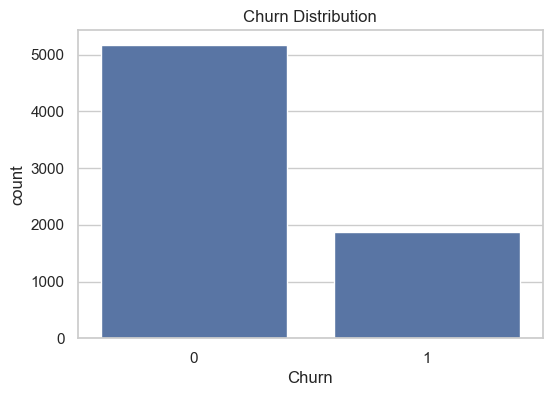

In [7]:
# BASIC EDA
# Churn by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

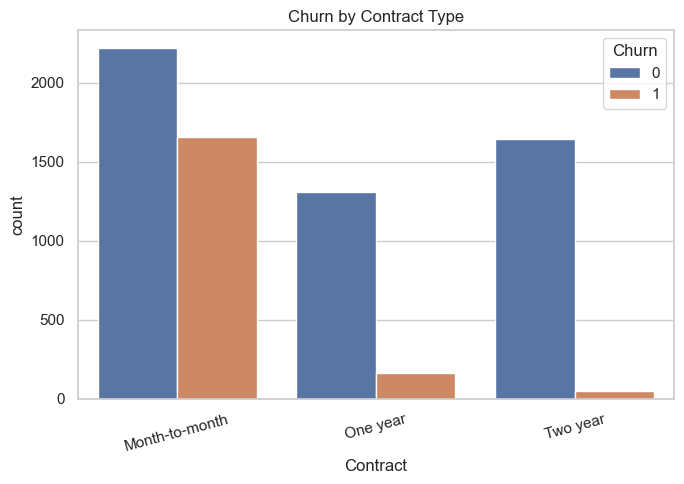

In [8]:
# Churn by Contract Type
plt.figure(figsize=(7,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

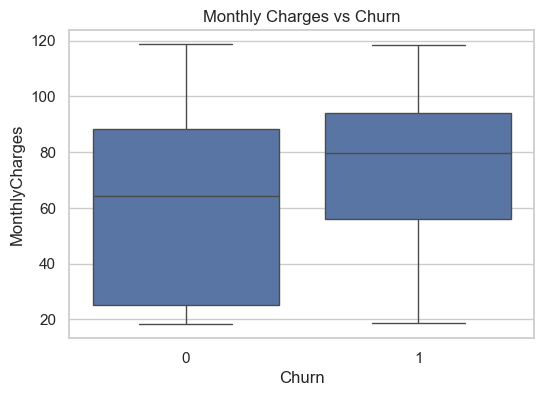

In [9]:
#Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

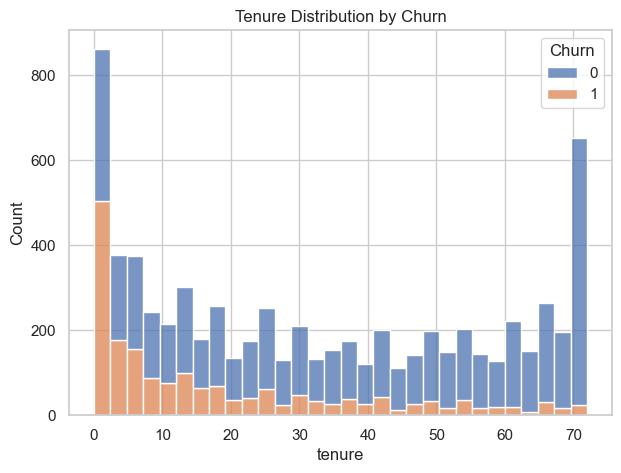

In [10]:
#Tenure distribution by Churn
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.show()

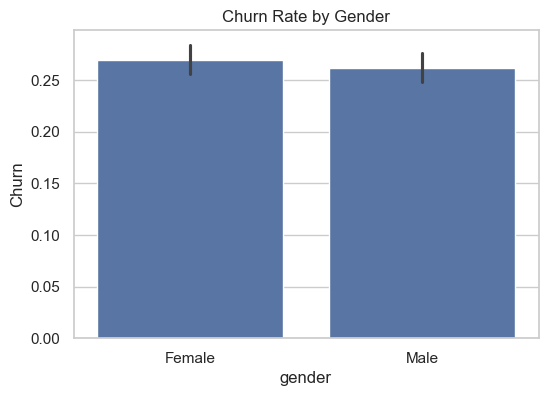

In [11]:
# Churn by gender
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='Churn', data=df, estimator=np.mean)
plt.title("Churn Rate by Gender")
plt.show()


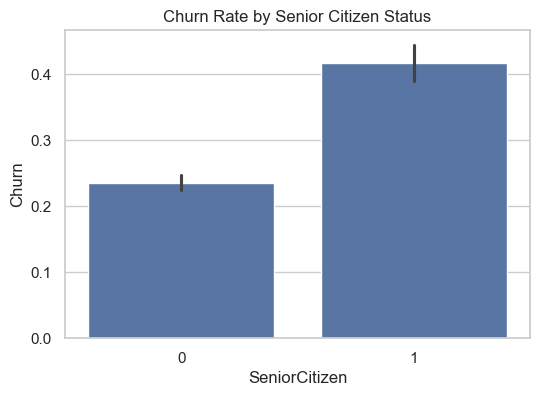

In [12]:

#Churn by Senior Citizen
plt.figure(figsize=(6,4))
sns.barplot(x='SeniorCitizen', y='Churn', data=df, estimator=np.mean)
plt.title("Churn Rate by Senior Citizen Status")
plt.show()

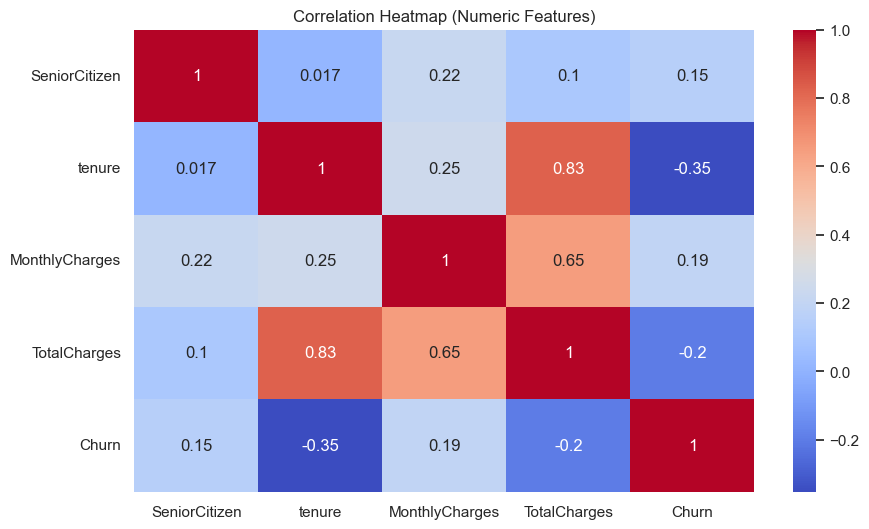

In [13]:
#Correlation heatmap (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

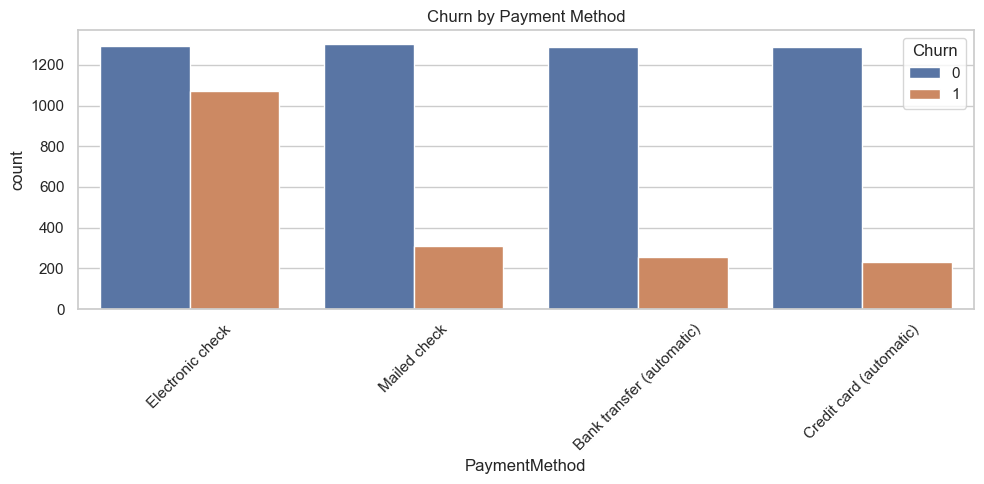

In [15]:
# Churn by Payment Method
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.tight_layout()
plt.show()

In [19]:
# FEATURE SELECTION & ENCODING

# We'll use these features
feature_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'InternetService',
    'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

df_model = df[feature_cols + ['Churn']].copy()

# Identify categorical columns
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Encode categorical columns
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", df_encoded.shape)
df_encoded = df_encoded.dropna()

df_encoded.head()

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Shape after encoding: (7043, 17)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,True,False,False,False,True,False,True,False


In [21]:
# Train / Test Split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set: (5625, 16)
Test set: (1407, 16)


In [23]:
# Model Training
log_reg_model = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_model.fit(X_train_scaled, y_train)

print("Logistic Regression Model trained successfully")


Logistic Regression Model trained successfully


Accuracy on test set: 0.8031

Confusion Matrix:
 [[920 113]
 [164 210]]


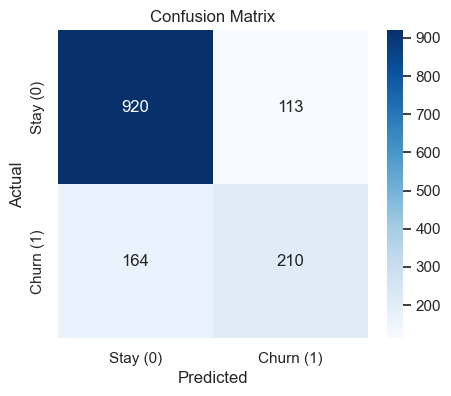


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [24]:
# Model Evaluation

y_pred = log_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Stay (0)', 'Churn (1)'],
            yticklabels=['Stay (0)', 'Churn (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [25]:
# Feature Importance

feature_names = X.columns
coefficients = log_reg_model.coef_[0]

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})
feature_importance['abs_coeff'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)

print("Top 15 most influential features:")
feature_importance.head(15)


Top 15 most influential features:


,feature,coefficient,abs_coeff
1,tenure,-1.342939,1.342939
11,Contract_Two year,-0.685092,0.685092
3,TotalCharges,0.613475,0.613475
8,InternetService_Fiber optic,0.417587,0.417587
10,Contract_One year,-0.345990,0.345990
7,PhoneService_Yes,-0.221547,0.221547
14,PaymentMethod_Electronic check,0.213153,0.213153
12,PaperlessBilling_Yes,0.169158,0.169158
2,MonthlyCharges,0.167421,0.167421
9,InternetService_No,-0.151308,0.151308


In [27]:
print(f"1) The model accuracy on the test set: {accuracy:.2%} .")

1) The model accuracy on the test set: 80.31% .


In [28]:
# Prediction Function For New Customers

model_columns = X.columns  # store for later use (and for Streamlit)

def predict_new_customer(input_dict):
    """
    input_dict: dictionary with keys matching the original feature_cols.
    Example keys:
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'InternetService',
    'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
    """
    df_temp = pd.DataFrame([input_dict])

    # One-hot encode using same categorical logic
    df_temp_encoded = pd.get_dummies(df_temp, columns=categorical_cols, drop_first=True)

    # Add any missing dummy columns
    for col in model_columns:
        if col not in df_temp_encoded.columns:
            df_temp_encoded[col] = 0

    # Ensure same column order
    df_temp_encoded = df_temp_encoded[model_columns]

    # Scale
    scaled = scaler.transform(df_temp_encoded)

    # Predict
    pred = log_reg_model.predict(scaled)[0]
    prob = log_reg_model.predict_proba(scaled)[0][1]

    return pred, prob

In [29]:
# Predict a Single New Customer
example_customer = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'InternetService': 'Fiber optic',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.0,
    'TotalCharges': 300.0
}

pred, prob = predict_new_customer(example_customer)
print("Prediction:", "Churn" if pred == 1 else "Stay")
print("Churn Probability:", f"{prob*100:.2f}%")

Prediction: Stay
Churn Probability: 48.37%


In [30]:
# Save Model, Scaler & Columns For Streamlit App
model_package = {
    'model': log_reg_model,
    'scaler': scaler,
    'columns': model_columns,
    'categorical_cols': categorical_cols
}

with open("churn_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Model package saved to 'churn_model.pkl'")

Model package saved to 'churn_model.pkl'
